In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# loading the data for class Jaw Clenches coloum ["EEG.AF3"]

In [2]:
df2 = pd.read_excel('1.xlsx')
df2.head()



,EEG.AF3,EEG.AF4,EEG.AF5,EEG.AF6,EEG.AF7,EEG.AF8,EEG.AF9,EEG.AF10,EEG.AF11,EEG.AF12,...,EEG.AF29,EEG.AF30,EEG.AF31,EEG.AF32,EEG.AF33,EEG.AF34,EEG.AF35,EEG.AF36,EEG.AF37,EEG.AF38
0,4209.230957,4342.051270,4232.307617,4276.922852,4232.307617,4250.256348,4232.307617,4268.205078,4206.153809,4241.538574,...,4236.410156,4198.974121,4167.692383,4116.410156,4261.538574,4228.205078,4265.641113,4216.410156,4336.410156,4546.153809
1,4214.358887,4375.897461,4273.846191,4206.153809,4263.589844,4242.051270,4281.025879,4298.974121,4300.000000,4260.000000,...,4176.410156,4327.179688,4182.563965,4114.358887,4287.692383,4273.333496,4309.230957,4313.846191,4332.820313,4542.563965
2,4215.384766,4405.641113,4331.794922,4265.641113,4254.358887,4284.102539,4298.461426,4297.436035,4302.051270,4282.563965,...,4286.666504,4306.666504,4190.769043,4117.436035,4288.717773,4301.538574,4261.538574,4289.743652,4294.358887,4542.051270
3,4210.256348,4374.358887,4289.230957,4322.563965,4243.589844,4285.128418,4281.538574,4245.641113,4307.179688,4265.128418,...,4307.692383,4210.256348,4175.897461,4114.358887,4274.358887,4255.897461,4262.563965,4206.153809,4293.333496,4539.487305
4,4208.717773,4354.358887,4238.974121,4331.282227,4240.000000,4246.153809,4268.717773,4245.128418,4347.179688,4238.461426,...,4205.641113,4225.128418,4275.384766,4113.333496,4302.563965,4210.256348,4279.487305,4246.153809,4324.102539,4530.256348


# EXtracting Features From Time series data for class Jaw Clenches

In [3]:
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy.stats import variation
from scipy.stats import iqr
from scipy.stats import entropy
from scipy.stats import power_divergence
from scipy import stats
from scipy.stats import moment

In [4]:
feature = []
for i in df2.columns:
    col =  df2[i].dropna()                                                                                                                 
    Peak_height = max(col) - min(col)
    sensor_response = max(col)
    peak_time = col.idxmax() - col.idxmin()
    area= np.trapz(col,x=(col.index))
    Kurtosis = kurtosis(col)
    Skew = skew(col)
    Variation = variation(col)
    IQR = iqr(col)
    Entropy= entropy(col)
    Power_divergance =power_divergence(col, lambda_='log-likelihood')
    Power_divergance = Power_divergance.statistic
    Jarque_bera = stats.jarque_bera(col)
    Jarque_bera = Jarque_bera[0]
    Moment = moment(col, moment=3)
    Mean = col.mean()
    Std = col.std()
    feature.append([Mean,Std,sensor_response,Peak_height,peak_time,area,Kurtosis,Skew,Moment,Variation,IQR,Entropy,Power_divergance,Jarque_bera])

In [5]:
data_22 = pd.DataFrame(feature,columns=['Mean','Std','sensor_response','Peak_height','peak_time','area','Kurtosis','Skew','Moment','Variation','IQR','Entropy','Power_divergance','Jarque_bera'])

# Features Name 

1) Mean 

2) Std  

3) sensor_response

4) Peak_height 

5)peak_time 

6)area 

7)Kurtosis 

8)Skew 

9)Moment 

10)Variation 

11)IQR

12)Entropy 

13)Power_divergance 

14)Jarque_bera'



In [6]:
data_22.head()

,Mean,Std,sensor_response,Peak_height,peak_time,area,Kurtosis,Skew,Moment,Variation,IQR,Entropy,Power_divergance,Jarque_bera
0,4187.584352,47.837602,4387.692383,246.153809,48,1.030045e+06,6.814169,2.683994,292043.164092,0.011401,24.615723,5.509324,133.091093,774.429359
1,4186.700359,51.986637,4405.641113,270.769531,-108,1.716421e+06,4.691500,2.266024,317214.256612,0.012402,24.102540,6.018517,262.235965,728.662307
2,4189.502482,36.085091,4375.897461,234.358887,664,3.154583e+06,13.674273,3.582226,167985.527360,0.008608,14.358886,6.625356,231.680557,7487.066272
3,4220.260856,63.631093,4406.666504,249.230469,92,9.705413e+05,2.531388,1.859836,476054.512551,0.015045,36.153809,5.442306,218.648738,194.847448
4,4187.582108,24.899986,4325.641113,192.307617,415,1.905280e+06,6.241887,2.042074,31422.346061,0.005940,22.692261,6.122475,67.098098,1057.186846


# loading the data for class Eye Blink coloum ["EEG.AF3"]

In [7]:
df1 = pd.read_excel('0.xlsx')
df1.head()

,EEG.AF3,EEG.AF4,EEG.AF5,EEG.AF6,EEG.AF7,EEG.AF8,EEG.AF9,EEG.AF10,EEG.AF11,EEG.AF12,...,EEG.AF36,EEG.AF37,EEG.AF38,EEG.AF39,EEG.AF40,EEG.AF41,EEG.AF42,EEG.AF43,EEG.AF44,EEG.AF45
0,4333.846191,4367.692383,4258.974121,4428.205078,4332.820313,4397.948730,4402.051270,4400.512695,4400.512695,4387.692383,...,4377.436035,4487.179688,4626.153809,4430.256348,4460.512695,4472.820313,4481.538574,4386.153809,4504.102539,4496.410156
1,4310.769043,4360.512695,4250.256348,4429.230957,4345.128418,4403.077148,4403.589844,4391.794922,4400.000000,4386.153809,...,4375.384766,4482.051270,4547.179688,4425.641113,4461.025879,4474.871582,4486.153809,4404.102539,4490.256348,4501.538574
2,4290.256348,4341.538574,4253.333496,4421.538574,4349.230957,4403.077148,4405.641113,4394.871582,4404.102539,4384.615234,...,4375.897461,4472.307617,4502.051270,4416.410156,4457.436035,4472.820313,4491.282227,4402.051270,4485.128418,4494.358887
3,4278.461426,4320.512695,4255.384766,4420.512695,4351.282227,4401.538574,4396.410156,4410.256348,4408.205078,4381.538574,...,4383.589844,4474.871582,4572.820313,4399.487305,4457.436035,4470.256348,4499.487305,4402.051270,4483.589844,4486.153809
4,4262.051270,4318.974121,4252.307617,4426.153809,4352.820313,4401.538574,4382.051270,4412.307617,4407.179688,4380.512695,...,4384.615234,4481.538574,4568.205078,4394.871582,4457.948730,4468.205078,4510.769043,4409.743652,4465.128418,4481.538574


# EXtracting Features From Time series data for class Eye Blink

In [8]:
features = []
for i in df1.columns:
    col =  df1[i].dropna()                                                                                                                 
    Peak_height = max(col) - min(col)
    sensor_response = max(col)
    peak_time = col.idxmax() - col.idxmin()
    area= np.trapz(col,x=(col.index))
    Kurtosis = kurtosis(col)
    Skew = skew(col)
    Variation = variation(col)
    IQR = iqr(col)
    Entropy= entropy(col)
    Power_divergance =power_divergence(col, lambda_='log-likelihood')
    Power_divergance = Power_divergance.statistic
    Jarque_bera = stats.jarque_bera(col)
    Jarque_bera = Jarque_bera[0]
    Moment = moment(col, moment=3)
    Mean = col.mean()
    Std = col.std()
    features.append([Mean,Std,sensor_response,Peak_height,peak_time,area,Kurtosis,Skew,Moment,Variation,IQR,Entropy,Power_divergance,Jarque_bera])

In [9]:
data_23 = pd.DataFrame(features,columns=['Mean','Std','sensor_response','Peak_height','peak_time','area','Kurtosis','Skew','Moment','Variation','IQR','Entropy','Power_divergance','Jarque_bera'])

In [10]:
data_23.head()

,Mean,Std,sensor_response,Peak_height,peak_time,area,Kurtosis,Skew,Moment,Variation,IQR,Entropy,Power_divergance,Jarque_bera
0,4181.793943,83.693183,4418.461426,334.871582,244,1.162367e+06,1.566518,1.540650,8.983286e+05,0.019978,54.872070,5.631014,461.012995,138.900075
1,4176.478710,53.523164,4367.692383,267.692383,-25,1.653775e+06,0.246417,0.797639,1.218396e+05,0.012799,80.512695,5.983855,270.723556,43.101497
2,4175.120756,84.425315,4424.615234,410.256347,300,1.578029e+06,0.632578,0.413195,2.476581e+05,0.020194,104.615478,5.937333,643.671359,17.103584
3,4192.706153,86.223776,4478.974121,383.589600,225,1.236598e+06,2.242924,1.773147,1.130892e+06,0.020530,54.999757,5.690151,516.935591,217.151818
4,4180.786747,73.517441,4443.077148,389.743896,-51,2.077677e+06,2.262323,1.131230,4.481390e+05,0.017567,67.179443,6.210447,638.422415,212.414241


# Features Name 

1) Mean 

2) Std  

3) sensor_response

4) Peak_height 

5)peak_time 

6)area 

7)Kurtosis 

8)Skew 

9)Moment 

10)Variation 

11)IQR

12)Entropy 

13)Power_divergance 

14)Jarque_bera'



# Asssigning Target Varibles

0  Eye Blink

1 Jaw Clenches

In [11]:
data_23['Target'] = 1
data_22['Target'] = 0

# Creating Finall data for Training

In [12]:
df_final = pd.concat([data_23,data_22])

In [13]:
df_final.head()

,Mean,Std,sensor_response,Peak_height,peak_time,area,Kurtosis,Skew,Moment,Variation,IQR,Entropy,Power_divergance,Jarque_bera,Target
0,4181.793943,83.693183,4418.461426,334.871582,244,1.162367e+06,1.566518,1.540650,8.983286e+05,0.019978,54.872070,5.631014,461.012995,138.900075,1
1,4176.478710,53.523164,4367.692383,267.692383,-25,1.653775e+06,0.246417,0.797639,1.218396e+05,0.012799,80.512695,5.983855,270.723556,43.101497,1
2,4175.120756,84.425315,4424.615234,410.256347,300,1.578029e+06,0.632578,0.413195,2.476581e+05,0.020194,104.615478,5.937333,643.671359,17.103584,1
3,4192.706153,86.223776,4478.974121,383.589600,225,1.236598e+06,2.242924,1.773147,1.130892e+06,0.020530,54.999757,5.690151,516.935591,217.151818,1
4,4180.786747,73.517441,4443.077148,389.743896,-51,2.077677e+06,2.262323,1.131230,4.481390e+05,0.017567,67.179443,6.210447,638.422415,212.414241,1


In [14]:
df_final.tail()

,Mean,Std,sensor_response,Peak_height,peak_time,area,Kurtosis,Skew,Moment,Variation,IQR,Entropy,Power_divergance,Jarque_bera,Target
31,4192.690194,37.455380,4477.948730,318.461425,472,2.289053e+06,36.738239,5.685825,2.979504e+05,0.008925,17.948731,6.304410,179.698089,33709.161973,0
32,4187.713469,60.264472,4326.153809,224.102539,-299,3.090501e+06,-0.556667,0.696296,1.520882e+05,0.014381,87.179688,6.605195,637.949591,69.256281,0
33,4199.053255,56.325002,4400.000000,274.871582,89,1.797101e+06,1.989926,1.615328,2.876366e+05,0.013398,47.179688,6.061368,321.080815,257.345451,0
34,4206.573415,77.219979,4527.179688,383.077149,232,1.615108e+06,8.584394,3.012030,1.381510e+06,0.018333,28.205078,5.953078,534.649568,1764.280195,0
35,4185.376625,53.460229,4546.153809,446.666504,-50,2.820749e+06,23.705790,4.168431,6.354761e+05,0.012764,28.717773,6.514633,452.399396,17760.031042,0


In [15]:
df_final.Target.value_counts()

1    43
0    36
Name: Target, dtype: int64

In [16]:
df_final.describe()

,Mean,Std,sensor_response,Peak_height,peak_time,area,Kurtosis,Skew,Moment,Variation,IQR,Entropy,Power_divergance,Jarque_bera,Target
count,79.000000,79.000000,79.000000,79.000000,79.000000,7.900000e+01,79.000000,79.000000,7.900000e+01,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,4187.429436,61.547619,4435.611804,333.781219,162.265823,1.993615e+06,8.304736,2.421591,5.874684e+05,0.014688,43.590527,6.128713,456.288518,3504.924302,0.544304
std,13.360689,23.339784,66.066735,91.687028,267.161898,5.694535e+05,7.694144,1.141957,4.663012e+05,0.005589,28.163329,0.280795,298.232272,5640.863446,0.501216
min,4145.220008,16.857295,4310.256348,165.641114,-519.000000,9.705413e+05,-0.770482,0.413195,1.586991e+04,0.004008,10.897217,5.442306,34.725909,17.103584,0.000000
25%,4180.218288,47.794178,4398.717774,269.230713,-47.000000,1.616493e+06,2.858750,1.621864,3.026092e+05,0.011382,21.025878,5.955613,237.905448,323.861468,0.000000
50%,4187.584352,63.631093,4430.769043,349.230713,92.000000,1.912333e+06,6.274397,2.277077,5.281595e+05,0.015169,36.410278,6.122475,437.917080,994.292618,1.000000
75%,4195.645951,77.469173,4465.641113,381.282227,414.000000,2.277524e+06,11.874285,3.228422,8.438419e+05,0.018468,58.397278,6.300667,639.513581,3839.148695,1.000000
max,4220.260856,120.511388,4644.102539,631.281983,812.000000,3.710695e+06,36.738239,5.685825,3.152960e+06,0.028977,142.820312,6.788862,1378.668266,33709.161973,1.000000


# Data Analysis part

In [17]:
x= df_final.corr()['Target']
x= abs(x)

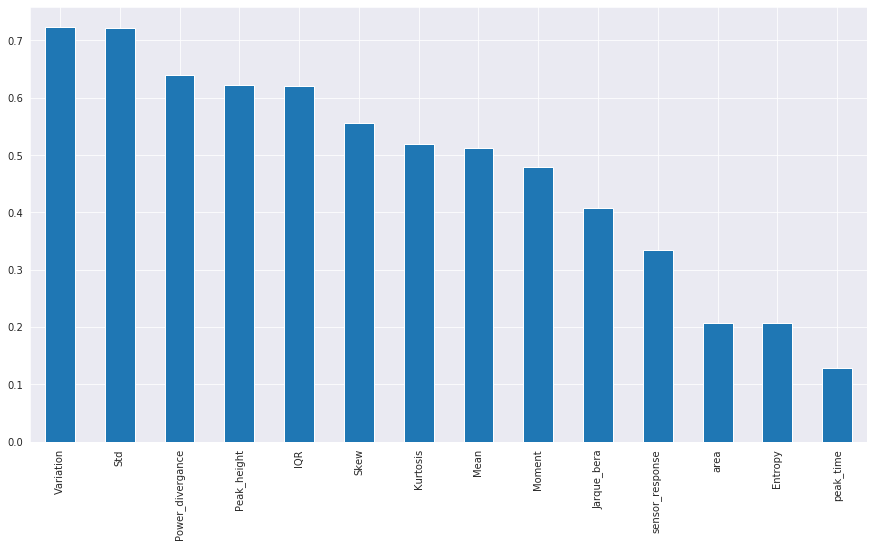

In [18]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,8))
x[:-1].sort_values(ascending=False).plot.bar()

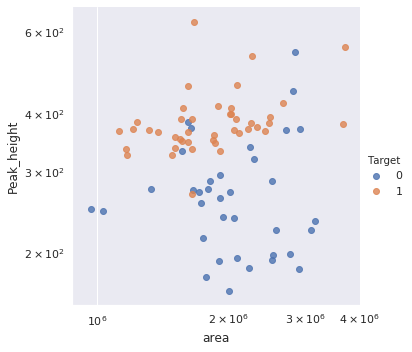

In [19]:
sns.set(color_codes=True)
grid = sns.lmplot(data=df_final, x='area', y='Peak_height', hue='Target',
                   fit_reg=False, legend=True, legend_out=True)
grid.set(xscale="log", yscale="log")

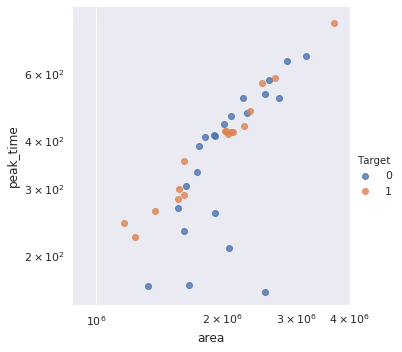

In [20]:
sns.set(color_codes=True)
grid = sns.lmplot(data=df_final, x='area', y='peak_time', hue='Target',
                   fit_reg=False, legend=True, legend_out=True)
grid.set(xscale="log", yscale="log")

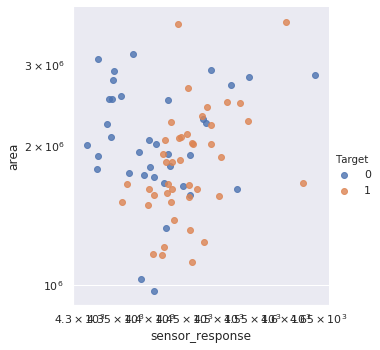

In [21]:
sns.set(color_codes=True)
grid =sns.lmplot(data=df_final, x='sensor_response', y='area', hue='Target',
                   fit_reg=False, legend=True, legend_out=True)
grid.set(xscale="log", yscale="log")

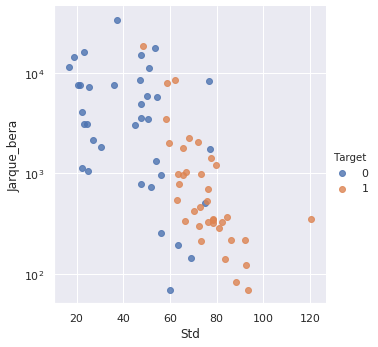

In [22]:
sns.set(color_codes=True)
grid = sns.lmplot(data=df_final, x='Std', y='Jarque_bera', hue='Target',
                   fit_reg=False, legend=True, legend_out=True)
grid.set( yscale="log")

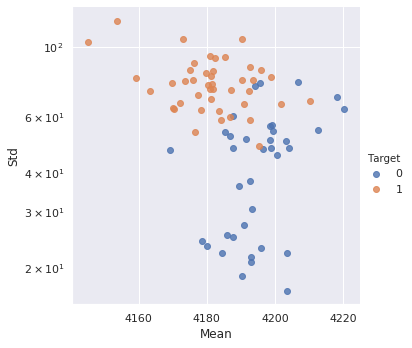

In [23]:
sns.set(color_codes=True)
grid = sns.lmplot(data=df_final, x='Mean', y='Std', hue='Target',
                   fit_reg=False, legend=True, legend_out=True)
grid.set( yscale="log")

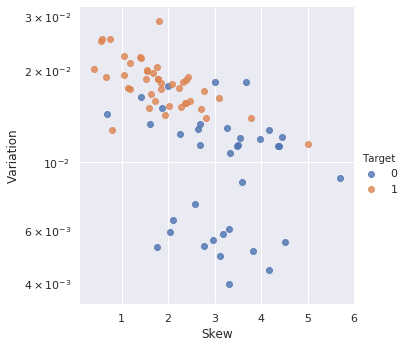

In [24]:
sns.set(color_codes=True)
grid = sns.lmplot(data=df_final, x='Skew', y='Variation', hue='Target',
                   fit_reg=False, legend=True, legend_out=True)
grid.set( yscale="log")

In [25]:
from mpl_toolkits import mplot3d
%matplotlib inline

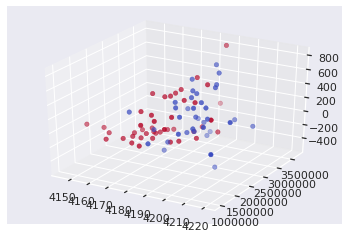

In [26]:
ax=plt.axes(projection='3d')
ax.scatter(df_final['Mean'],df_final['area'],df_final['peak_time'],c=df_final.Target,cmap='coolwarm',linewidth=0.5)

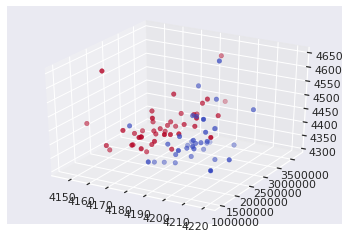

In [27]:
ax=plt.axes(projection='3d')
ax.scatter(df_final['Mean'],df_final['area'],df_final['sensor_response'],c=df_final.Target,cmap='coolwarm',linewidth=0.5)

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X = df_final.drop('Target',axis=1)
y = df_final.Target

In [30]:
c= df_final.columns

Feature ranking:
1. Variation (0.122386)
2. Peak_height (0.116924)
3. IQR (0.116198)
4. Std (0.111819)
5. Power_divergance (0.094270)
6. Mean (0.076247)
7. Skew (0.071390)
8. Moment (0.061670)
9. Kurtosis (0.052541)
10. sensor_response (0.047944)
11. Jarque_bera (0.040198)
12. peak_time (0.035588)
13. area (0.028614)
14. Entropy (0.024210)


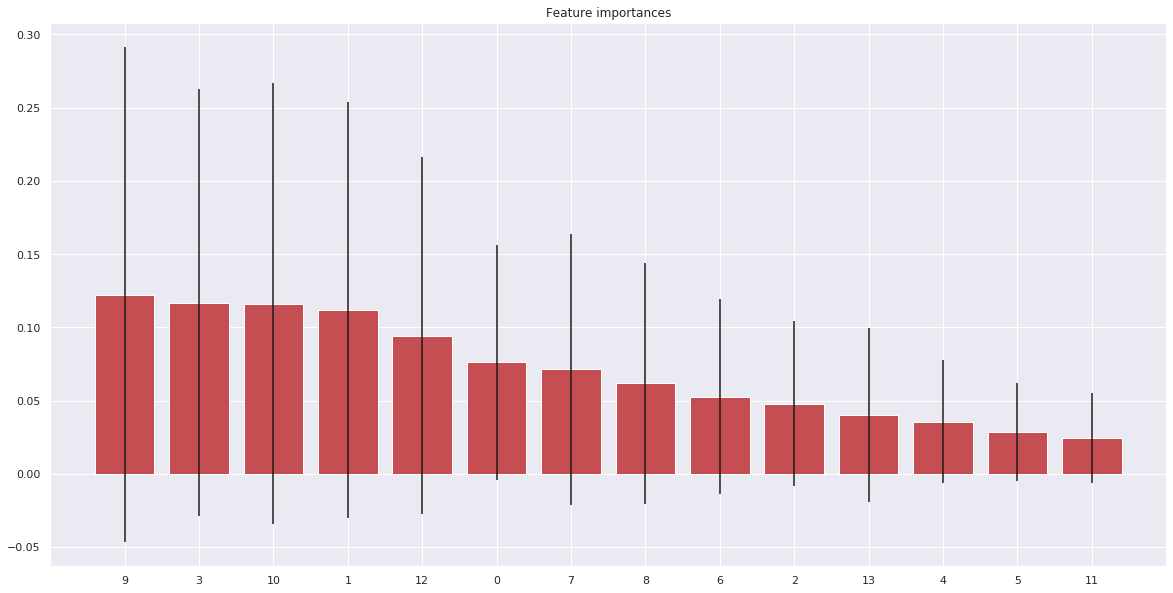

In [31]:
from sklearn.ensemble import ExtraTreesClassifier

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, c[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(20,10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [32]:
d= {'peak_time':0.100336,'variance':0.079794,'power_divergence':0.076113,'sensor_response':0.074604,
    'Entropy':0.074116,'IQR':0.073861,'Std':0.073100,'Peak_height':0.071894,'skew':0.071386,'jarque_bera':0.067211,
    'kurtosis':0.062463,'area':0.060044,'moment':0.059148,'Mean':0.055931}

In [33]:
s = pd.Series(d)

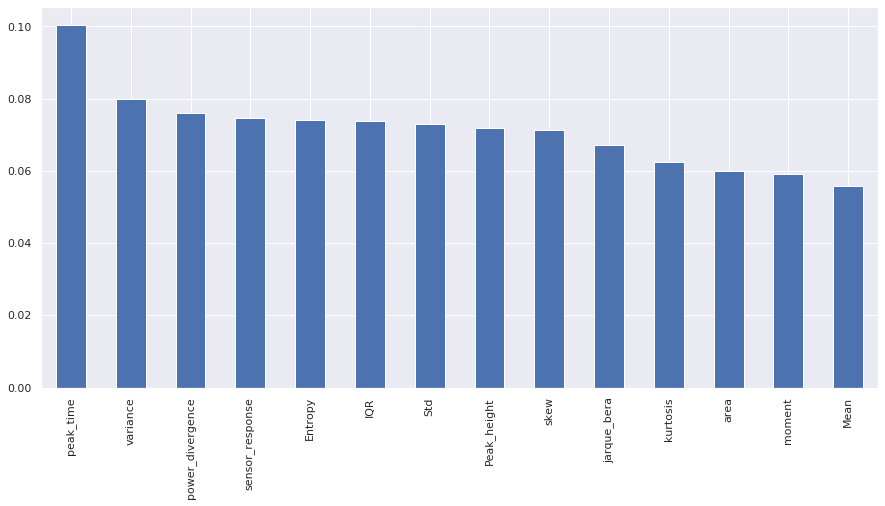

In [34]:
plt.figure(figsize=(15,7))
s.plot.bar()

In [35]:
X.shape

(79, 14)

In [36]:
y

0     1
1     1
2     1
3     1
4     1
     ..
31    0
32    0
33    0
34    0
35    0
Name: Target, Length: 79, dtype: int64

# Creating the Model 

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# Random Forest 

In [39]:
model = RandomForestClassifier(n_estimators=100)

In [40]:
model.fit(X_train,y_train)

RandomForestClassifier()

# Accurcay Metrics 

In [41]:
y_pred = model.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.8333333333333334


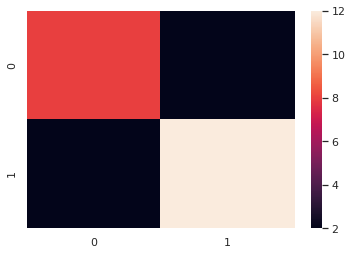

In [42]:
sns.heatmap(confusion_matrix(y_test,y_pred))

In [43]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 8  2]
 [ 2 12]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.86      0.86      0.86        14

    accuracy                           0.83        24
   macro avg       0.83      0.83      0.83        24
weighted avg       0.83      0.83      0.83        24



# visualization of random forest 

[Text(494.5909090909091, 498.3, 'X[1] <= 63.798\ngini = 0.487\nsamples = 38\nvalue = [23, 32]'),
 Text(304.3636363636364, 407.70000000000005, 'X[4] <= 460.5\ngini = 0.302\nsamples = 20\nvalue = [22, 5]'),
 Text(152.1818181818182, 317.1, 'X[13] <= 56.179\ngini = 0.159\nsamples = 17\nvalue = [21, 2]'),
 Text(76.0909090909091, 226.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(228.27272727272728, 226.5, 'X[1] <= 56.527\ngini = 0.087\nsamples = 16\nvalue = [21, 1]'),
 Text(152.1818181818182, 135.89999999999998, 'gini = 0.0\nsamples = 13\nvalue = [18, 0]'),
 Text(304.3636363636364, 135.89999999999998, 'X[8] <= 617098.094\ngini = 0.375\nsamples = 3\nvalue = [3, 1]'),
 Text(228.27272727272728, 45.299999999999955, 'gini = 0.0\nsamples = 2\nvalue = [3, 0]'),
 Text(380.4545454545455, 45.299999999999955, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(456.54545454545456, 317.1, 'X[8] <= 470192.484\ngini = 0.375\nsamples = 3\nvalue = [1, 3]'),
 Text(380.4545454545455, 226.5, 'gini = 0.0\ns

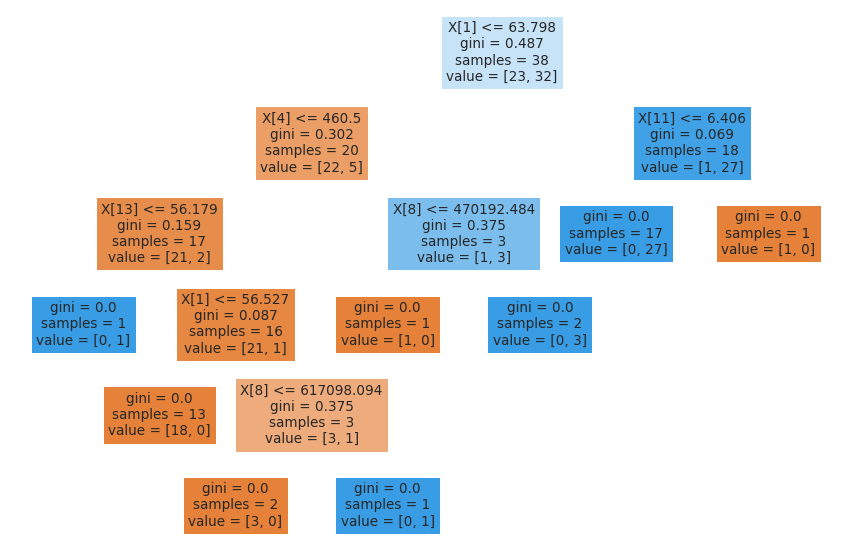

In [44]:
from sklearn import tree

plt.figure(figsize=(15,10))
tree.plot_tree(model.estimators_[2],filled=True)

[Text(418.5, 489.24, 'X[10] <= 36.795\ngini = 0.472\nsamples = 37\nvalue = [21, 34]'),
 Text(167.4, 380.52000000000004, 'X[8] <= 547357.781\ngini = 0.236\nsamples = 17\nvalue = [19, 3]'),
 Text(83.7, 271.8, 'gini = 0.0\nsamples = 13\nvalue = [17, 0]'),
 Text(251.10000000000002, 271.8, 'X[4] <= 293.0\ngini = 0.48\nsamples = 4\nvalue = [2, 3]'),
 Text(167.4, 163.08000000000004, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(334.8, 163.08000000000004, 'gini = 0.0\nsamples = 2\nvalue = [0, 3]'),
 Text(669.6, 380.52000000000004, 'X[5] <= 2638488.0\ngini = 0.114\nsamples = 20\nvalue = [2, 31]'),
 Text(585.9, 271.8, 'X[12] <= 344.418\ngini = 0.061\nsamples = 19\nvalue = [1, 31]'),
 Text(502.20000000000005, 163.08000000000004, 'X[4] <= 32.0\ngini = 0.444\nsamples = 2\nvalue = [1, 2]'),
 Text(418.5, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [0, 2]'),
 Text(585.9, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(669.6, 163.08000000000004, 'gini = 0.0\nsamples 

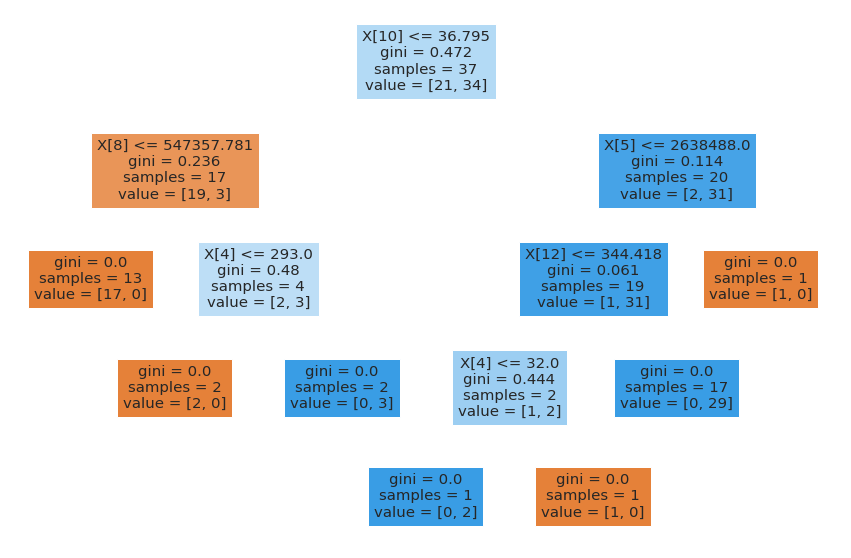

In [45]:
from sklearn import tree

plt.figure(figsize=(15,10))
tree.plot_tree(model.estimators_[1],filled=True)

# Threshold value shifiting and ROC and AUC curve for model 

In [46]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Creating 4 base Model for Threshold value shifiting

# RandomForestClassifier

In [47]:
## Apply RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 1.0
RF test roc-auc: 0.8928571428571428


# AdaBoostClassifier

In [48]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 1.0
Adaboost test roc-auc: 0.8571428571428572


# KNeighborsClassifier

In [49]:

from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.9582228116710876
Adaboost test roc-auc: 0.5928571428571429


# LogisticRegression

In [50]:

from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(X_train, y_train)
ytrain_pred = log_classifier.predict_proba(X_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.9442970822281167
Logistic test roc-auc: 0.9571428571428571


# No we will focus on selecting the best threshold for maximum accuracy

In [51]:
for model in [rf_model,log_classifier,ada_classifier,knn_classifier]:
    #k = model.predict_proba(X_test)[:,1]
    k = pd.Series(model.predict_proba(X_test)[:,1])
    print(k)

0     0.39
1     1.00
2     0.97
3     0.95
4     0.66
5     0.90
6     0.84
7     0.41
8     0.84
9     0.61
10    0.08
11    0.70
12    0.13
13    0.79
14    0.99
15    0.02
16    0.03
17    0.01
18    0.54
19    1.00
20    0.94
21    0.00
22    0.42
23    0.00
dtype: float64
0     0.875564
1     0.957182
2     0.997990
3     0.979513
4     0.875452
5     0.999945
6     0.999007
7     0.072940
8     0.996196
9     0.996147
10    0.361509
11    0.884553
12    0.041733
13    0.999944
14    0.916485
15    0.000155
16    0.008092
17    0.029911
18    0.844038
19    1.000000
20    0.999998
21    0.011493
22    0.178307
23    0.003067
dtype: float64
0     0.312080
1     0.901978
2     0.808182
3     0.803548
4     0.595220
5     0.766345
6     0.876250
7     0.815310
8     0.687490
9     0.296910
10    0.134043
11    0.535321
12    0.158786
13    0.647719
14    0.837380
15    0.066526
16    0.145456
17    0.148845
18    0.203085
19    0.941074
20    0.952631
21    0.136994
22    0.262731
2

In [52]:
pred=[]
for model in [rf_model,log_classifier,ada_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.8785714285714286


In [53]:
pd.concat(pred,axis=1)

,0,1,2,3
0,0.39,0.875564,0.312080,0.0
1,1.00,0.957182,0.901978,1.0
2,0.97,0.997990,0.808182,1.0
3,0.95,0.979513,0.803548,1.0
4,0.66,0.875452,0.595220,0.0
5,0.90,0.999945,0.766345,0.8
6,0.84,0.999007,0.876250,0.4
7,0.41,0.072940,0.815310,1.0
8,0.84,0.996196,0.687490,0.4
9,0.61,0.996147,0.296910,0.4


In [54]:
#### Calculate the ROc Curve


fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.9731574 , 0.9731574 , 0.94404288, 0.93596606, 0.57576422,
       0.57456267, 0.53266803, 0.49678083, 0.39441108, 0.3438879 ,
       0.21525936, 0.02167018])

In [55]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
5,0.574563,0.833333
7,0.496781,0.833333
9,0.343888,0.833333
4,0.575764,0.791667
6,0.532668,0.791667


# As per Above result our Threshold value for Model should be 0.57 if we only foucs on accuracy

In [56]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

# ROC and AUC Curve 

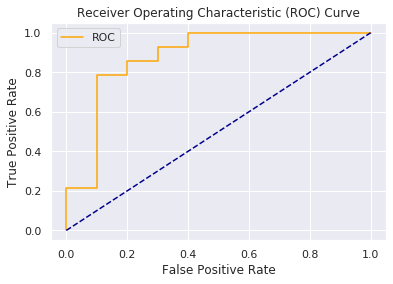

In [57]:

plot_roc_curve(fpr,tpr)

# Interpreting EEG Prediction(Eye Blink or Jaw Clench) with Eli5

In [58]:
import eli5

/home/nitin/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/nitin/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


In [59]:
class_names = ['Eye Blink','Jaw Clench'] 

In [60]:
feature_names = ['Mean','Std','sensor_response','Peak_height','peak_time','area','Kurtosis','Skew','Moment','Variation','IQR','Entropy','Power_divergance','Jarque_bera']

In [61]:
# Showing the Weight for our model
eli5.show_weights(rf_model,top=10)


Weight,Feature
0.1696 ± 0.5467,x8
0.1476 ± 0.5571,x1
0.1290 ± 0.5259,x9
0.1050 ± 0.4472,x10
0.0981 ± 0.4426,x12
0.0654 ± 0.3508,x3
0.0504 ± 0.2225,x13
0.0448 ± 0.2218,x2
0.0380 ± 0.1953,x0
0.0379 ± 0.1625,x5


In [62]:
# Clearly Define Feature Names
eli5.show_weights(rf_model,feature_names =feature_names,target_names=class_names,top=10)

Weight,Feature
0.1696 ± 0.5467,Moment
0.1476 ± 0.5571,Std
0.1290 ± 0.5259,Variation
0.1050 ± 0.4472,IQR
0.0981 ± 0.4426,Power_divergance
0.0654 ± 0.3508,Peak_height
0.0504 ± 0.2225,Jarque_bera
0.0448 ± 0.2218,sensor_response
0.0380 ± 0.1953,Mean
0.0379 ± 0.1625,area


# Narrative
+ Now it shows the feature names alongside their weight
+ How each feature contribute to influence the prediction
+ Bias means an intercept
+ Bias is the intercept where our line intercepts the y-axis for (linear regression). In ML we can call intercepts bias.
+ Bias offsets all predictions that we make.

In [63]:
# Show Explaination For A Single Prediction
eli5.show_prediction(rf_model,X_test.iloc[0],feature_names=feature_names,target_names=class_names)

In [64]:
# Show Explaination For A Single Prediction
eli5.show_prediction(rf_model,X_test.iloc[1],feature_names=feature_names,target_names=class_names)

# Conclusion
Each of the various libraries has their own method of interpreting the model

Each was able to explain why our selected prediction was non-DM

In [65]:
# Load ML Interpreting Models
import shap

In [66]:
# Initialize JS For Plot
shap.initjs()

In [67]:
# Explainer
explainer = shap.KernelExplainer(rf_model.predict_proba,X_train)

In [68]:
shap_values = explainer.shap_values(X_test.iloc[0,:])

/home/nitin/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/nitin/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


In [69]:

# Single Sample Value
X_test.iloc[0,:]

Mean                4.183661e+03
Std                 6.238498e+01
sensor_response     4.601539e+03
Peak_height         5.564104e+02
peak_time          -4.800000e+01
area                3.710695e+06
Kurtosis            1.410712e+01
Skew                2.701969e+00
Moment              6.549173e+05
Variation           1.490318e-02
IQR                 2.833325e+01
Entropy             6.788862e+00
Power_divergance    8.145636e+02
Jarque_bera         8.443892e+03
Name: 30, dtype: float64

In [70]:
 #A Single Prediction
shap.force_plot(explainer.expected_value[0],shap_values[0],X_test.iloc[0,:])

In [71]:

# Single Sample Value
X_test.iloc[15,:]

Mean                4.189502e+03
Std                 3.608509e+01
sensor_response     4.375897e+03
Peak_height         2.343589e+02
peak_time           6.640000e+02
area                3.154583e+06
Kurtosis            1.367427e+01
Skew                3.582226e+00
Moment              1.679855e+05
Variation           8.607503e-03
IQR                 1.435889e+01
Entropy             6.625356e+00
Power_divergance    2.316806e+02
Jarque_bera         7.487066e+03
Name: 2, dtype: float64

In [72]:
# A Sample Prediction for Malignant value 15
shap_values2 = explainer.shap_values(X_test.iloc[15,:])

/home/nitin/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/nitin/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


In [73]:
# Output for First
shap_values2[0]

array([0.00827631, 0.0767666 , 0.01241749, 0.04358587, 0.        ,
       0.03322796, 0.01954762, 0.02176355, 0.07849256, 0.06481415,
       0.03788975, 0.0474575 , 0.05142536, 0.01651708])

In [74]:
# Output for Second
shap_values2[1]

array([-0.00827631, -0.0767666 , -0.01241749, -0.04358587,  0.        ,
       -0.03322796, -0.01954762, -0.02176355, -0.07849256, -0.06481415,
       -0.03788975, -0.0474575 , -0.05142536, -0.01651708])

In [75]:
explainer.expected_value[0]

0.4678181818181817

In [76]:
# A Single Prediction
shap.force_plot(explainer.expected_value[0],shap_values2[0],X_test.iloc[15,:])

In [77]:
# A Single Prediction
shap.force_plot(explainer.expected_value[1],shap_values2[1],X_test.iloc[15,:])

# Narrative

Normal base value =.0.4692727272727275

The sum of the red and the blue = output 0.97

All the features in red are pushing the prediction from the base value to the prediction value

In [78]:
shap_values_all = explainer.shap_values(X_test)

/home/nitin/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/nitin/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/nitin/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior wil

/home/nitin/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/nitin/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/nitin/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior wil

/home/nitin/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/nitin/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


In [79]:
# Force Plot  All Prediction of Entire Test
shap.force_plot(explainer.expected_value[0],shap_values_all[0],X_test)

In [80]:
# Force Plot  All Prediction of Entire Test
shap.force_plot(explainer.expected_value[0],shap_values_all[0],X_test)

In [81]:
# Force Plot  All Prediction of Entire Test
shap.force_plot(explainer.expected_value[0],shap_values_all[0],X_test)

In [82]:
# Force Plot  All Prediction of Entire Test
shap.force_plot(explainer.expected_value[0],shap_values_all[0],X_test)

In [83]:
# Force Plot  All Prediction of Entire Test
shap.force_plot(explainer.expected_value[0],shap_values_all[0],X_test)

In [84]:
# Force Plot  All Prediction of Entire Test
shap.force_plot(explainer.expected_value[0],shap_values_all[0],X_test)

In [85]:
# Force Plot  All Prediction of Entire Test
shap.force_plot(explainer.expected_value[0],shap_values_all[0],X_test)

In [86]:
# Force Plot  All Prediction of Entire Test
shap.force_plot(explainer.expected_value[0],shap_values_all[0],X_test)

In [87]:
# Force Plot  All Prediction of Entire Test
shap.force_plot(explainer.expected_value[0],shap_values_all[0],X_test)